<a href="https://colab.research.google.com/github/onediojunior/Courses.CognitiveClass.AI/blob/master/Codenation_M%C3%B3dulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorando o valor do aluguel
<hr/>

dados : https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent
<hr/>

Colunas do Dataset
* city : cidade onde o imóvel está localizado <br>
* area : área do imóvel <br>
* rooms: número de quartos <br>
* bathroom: número de banheiros <br>
* parking spaces: número de vagas <br>
* floor: andar <br>
* animal: aceita animais? <br>
* furniture: mobiliada? <br>
* hoa: valor do condominio <br>
* rent amount: valor do aluguel <br>
* property tax: IPTU <br>
* fire insurance: seguro incêndio <br>
* total: valor total <br>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/content/datasets_554905_1035602_houses_to_rent_v2.csv")

In [ ]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [ ]:
df.dtypes.value_counts()

int64     9
object    4
dtype: int64

In [ ]:
# apresenta a quantidade de instâncias
print(f"Quantidade de registros: {df.shape[0]}")

Quantidade de registros: 10692


In [ ]:
# verificando se há campo nulo e seu quantitativo
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


## Estatística Univariada
<hr/>

In [4]:
# renomeando a coluna rent amount (R$)
df.rename(columns= {"rent amount (R$)" : "valor_aluguel"}, inplace=True)

In [ ]:
# verificando o valor médio dos aluguéis 
print(f"Valor médio dos aluguéis: {np.round(df.valor_aluguel.mean(), decimals=2)}")

Valor médio dos aluguéis: 3896.25


In [ ]:
# verificando o aluguel mais baixo
print(f"Aluguel mais baixo no dataset: {df.valor_aluguel.min()}")

Aluguel mais baixo no dataset: 450


In [ ]:
# verificando o aluguel mais alto
print(f"Aluguel mais baixo no dataset: {df.valor_aluguel.max()}")

Aluguel mais baixo no dataset: 45000


In [ ]:
# verificando a mediana do dataset
print(f"Mediana do dataset: {df.valor_aluguel.median()}")

Mediana do dataset: 2661.0


Obs: Diferença alta entre média e mediana (possíveis outliers).

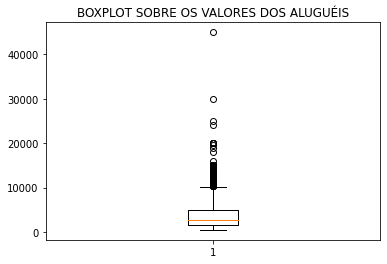

In [ ]:
# traçando um gráfico boxplot
plt.boxplot(x=df.valor_aluguel)
plt.title("BOXPLOT SOBRE OS VALORES DOS ALUGUÉIS")
plt.show()


Obs: Conforme gráfico de boxplot podemos verificar a existência de outliers no dataset analisado. 

In [ ]:
# verificando o desvio padrão dos dados
print(f"Desvio padrão: {np.round(df.valor_aluguel.std(), decimals=3)}")

Desvio padrão: 3408.546


O desvio padrão alto nos confirma que os dados são dispersos.

In [ ]:
df.valor_aluguel.describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

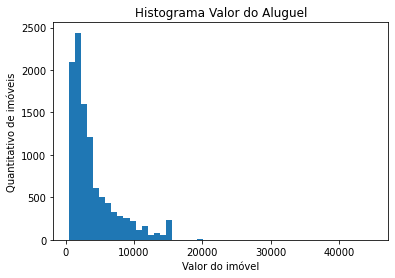

In [ ]:
# criando um histograma sobre a coluna volor do aluguel
plt.hist(x=df.valor_aluguel, bins=50)
plt.title("Histograma Valor do Aluguel")
plt.xlabel("Valor do imóvel")
plt.ylabel("Quantitativo de imóveis")
plt.show()

In [ ]:
# skewness positive skew
df.valor_aluguel.skew()

1.8388773035440982

In [ ]:
# kurtose - leptocurtica
df.valor_aluguel.kurtosis()

4.624228179818687

## Estatística Bivariada e Multivariada
<hr/>

###Correlação
* medida padronizada da relação entre duas variáveis
* indica a força (correlação forte, fraca, nula) e a direção do relacionamento das duas variáveis (positiva ou negativa)

### Correlação de Spearman
Avalia a relação entre duas variáveis qualitativas ordinais ou entre uma variável quantitativa e uma qualitativa ordinal

### Perguntas
<hr/>
1) Qual a cidade com a média de aluguel mais alta? <br>
2) Quantos banheiros existem nas residências com alguéis mais altos? <br>
3) Os imóveis mais caros aceitam animais? <br>
4) Os imóveis mais caros são mobiliados? <br>

In [ ]:
# Qual a cidade com a média de aluguel mais cara
valor_aluguel_cidade = df.groupby("city")["valor_aluguel"].mean().reset_index().sort_values("valor_aluguel", ascending = False)
print(df.groupby("city")["valor_aluguel"].mean().reset_index().sort_values("valor_aluguel", ascending = False))
print(f"\n\nCidade com média de aluguel mais alta: {valor_aluguel_cidade.city.iloc[0]}")

             city  valor_aluguel
4       São Paulo    4652.793783
0  Belo Horizonte    3664.127981
3  Rio de Janeiro    3232.904064
1        Campinas    2364.290739
2    Porto Alegre    2337.699916


Cidade com média de aluguel mais alta: São Paulo


In [ ]:
df["valor_aluguel"].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

Obs: Aluguéis mais altos serão os que estão acima 3º Quartil (R$ 5.000,00).

In [ ]:
# criando uam coluna definindo valor alto e baixa, conforme valor do aluguel

df["classificacao_aluguel"] = ["Alto" if x > 5000 else "Baixo" for x in df["valor_aluguel"]]

In [ ]:
# verificando as 5 primeiras linhas da coluna classificacao_aluguel
df.classificacao_aluguel.head(7)

0    Baixo
1    Baixo
2    Baixo
3    Baixo
4    Baixo
5     Alto
6    Baixo
Name: classificacao_aluguel, dtype: object

In [ ]:
# realizando a contagem dos valores Alto e Baixo
df["classificacao_aluguel"].value_counts()

Baixo    8153
Alto     2539
Name: classificacao_aluguel, dtype: int64

In [ ]:
# Quantos banheiros existem nas residências com aluguéis mais altos
df_alugueis_altos = df[df.valor_aluguel > 5000]
media_banheiro = np.round(df_alugueis_altos.bathroom.mean())
print(f"Média de banheiros nas casas de alguéis alto: {media_banheiro}")


Média de banheiros nas casas de alguéis alto: 4.0


In [ ]:
# Quantos banheiros existem nas residências com aluguéis mais altos - 2 Forma
df.groupby("classificacao_aluguel")["bathroom"].mean()

classificacao_aluguel
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

###Hipóteses
<hr/>
1) São Paulo é a cidade com o aluguel mais caro <br>
2) Quanto mais banheiro em um imóvel maior o valor do aluguel <br>
3) Os imóveis mobiliados tem o alguel mais caro

In [ ]:
# verifcando a correlação de pearson para os atributos valor_aluguel e bathroom
# Quanto mais banheiro em um imóvel maior o valor do aluguel
correlacao = df[["valor_aluguel","bathroom"]].corr(method="pearson")
print(correlacao)

               valor_aluguel  bathroom
valor_aluguel       1.000000  0.668504
bathroom            0.668504  1.000000


In [6]:
import seaborn as sbn

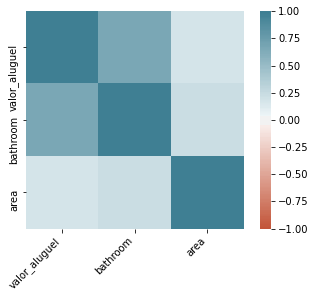

In [ ]:
corr = df[["valor_aluguel","bathroom","area"]].corr()
ax = sbn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sbn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Obs: pelo resultado das comparações existe uma correlação mais forte com o atributo banheiro do que área.

### Visualizações
* Histogram: distribução de frequência 
* Box Plot : variação de dados observados de uma variável numérica por meio de caixa 
* Scatter Plot : representa duas (tipicamente) ou mais variáveis 
* Correlação : apresentação das correlação em uma matrix 
* Linear: 
* Bar:

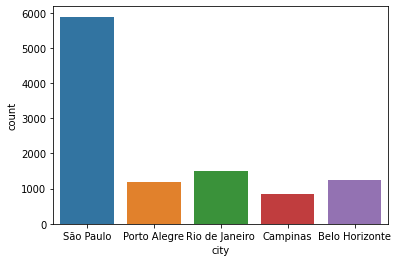

In [23]:
sbn.countplot(x="city", data=df);

In [24]:
# verificando os valores usando value_counts
df["city"].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

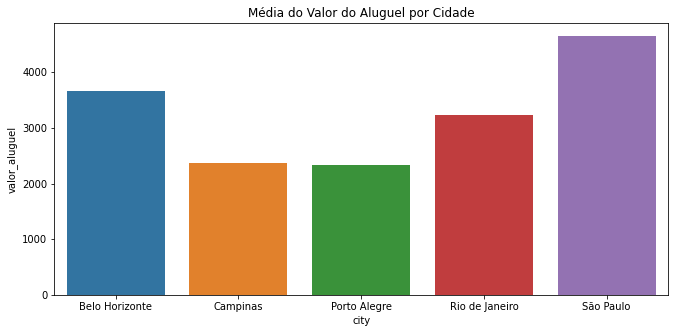

In [32]:
# gerando gráfico de barra cidade x valor do aluguel média praticada
plt.figure(figsize=(11,5))
plt.xlabel("")
plt.title("Média do Valor do Aluguel por Cidade")
sbn.barplot(x="city", y="valor_aluguel", data=df.groupby("city")["valor_aluguel"].mean().reset_index());

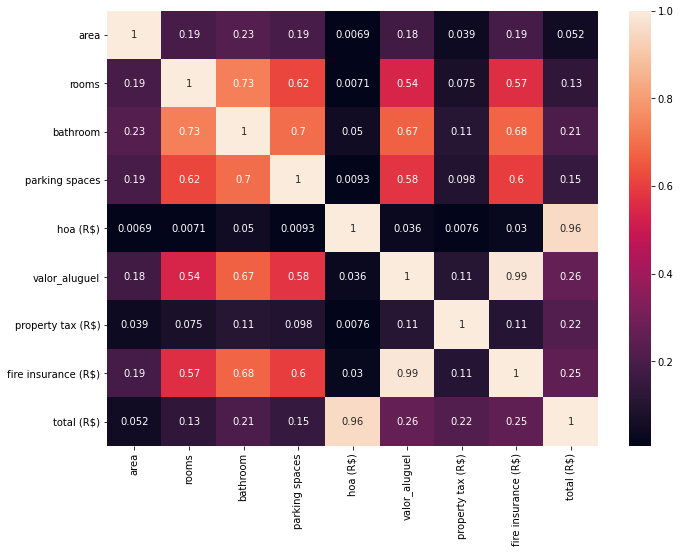

In [37]:
plt.figure(figsize=(11,8))
sbn.heatmap(df.corr(), annot=True)
plt.show()